From current google sheet (individual call review), open call review stats sheet, locate tab based on individuals role, and add scores to sheet in that employees row.

In [ ]:
function openAndAddScoresToTargetSheet() {
  try {
    var sheetA = SpreadsheetApp.getActiveSpreadsheet().getSheetByName('Setup Page');
    if (!sheetA) throw new Error("Sheet 'Setup Page' not found.");

    var targetSheetName = sheetA.getRange('F4').getValue();

    if (targetSheetName) {
      var spreadsheetBId = 'sheet name here'; // Replace with the ID of Stats Sheet each year
      var spreadsheetB = SpreadsheetApp.openById(spreadsheetBId);

      var targetSheet = spreadsheetB.getSheetByName(targetSheetName);

      if (targetSheet) {
        var currentSheet = SpreadsheetApp.getActiveSpreadsheet().getActiveSheet();

        // Get representative's name and scores from the current sheet
        var repName = currentSheet.getRange('C3').getValue();
        var scoreF10 = currentSheet.getRange('F10').getValue();
        var scoreG10 = currentSheet.getRange('G10').getValue();
        var quarterF9 = currentSheet.getRange('F9').getValue();
        var quarterG9 = currentSheet.getRange('G9').getValue();

        // Convert to whole number
        var scoreF10Whole = Math.round(scoreF10 * 100);
        var scoreG10Whole = Math.round(scoreG10 * 100);

        // Find the representative's row in the target sheet
        var repRow = targetSheet.getRange('B:B').getValues().flat().indexOf(repName) + 1;

        // Find the correlating column in the target sheet for email1Column
        var email1Column = targetSheet.getRange('F21:V21').getValues().flat().indexOf(quarterF9) + 6;

        // Find the correlating column in the target sheet for emaill2Column
        var email2Column = targetSheet.getRange('F21:V21').getValues().flat().indexOf(quarterG9) + 6;

        if (repRow > 0) {
          // Add scores to the representative's line in the target sheet
          targetSheet.getRange(repRow, email1Column).setValue(scoreF10Whole);
          targetSheet.getRange(repRow, email2Column).setValue(scoreG10Whole);

          Logger.log("Scores added to the target sheet successfully.");

          // Open the target sheet in a new tab
          var newTabUrl = spreadsheetB.getUrl() + '#gid=' + targetSheet.getSheetId();
          var html = '<script>window.open("' + newTabUrl + '", "_blank");</script>';
          SpreadsheetApp.getUi().showModalDialog(HtmlService.createHtmlOutput(html), 'Opening Target Sheet');
        } else {
          throw new Error("Representative not found in target sheet.");
        }
      } else {
        throw new Error("Target sheet named '" + targetSheetName + "' not found.");
      }
    } else {
      throw new Error("No target sheet name in cell F4.");
    }
  } catch (error) {
    Logger.log(error.message);
    throw error; // Rethrow the error to display it in the Apps Script log
  }
}

Example of Google Sheet to track individual queue performance:

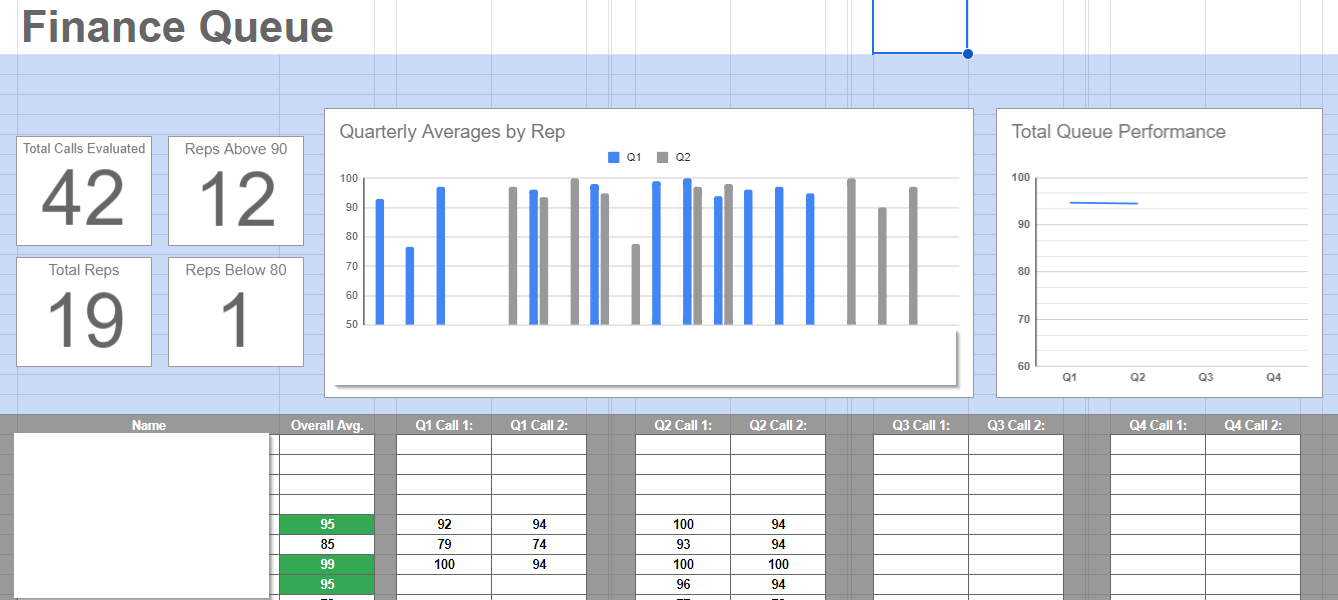

Exampe of Google sheet to pull results from all stats and display trends:

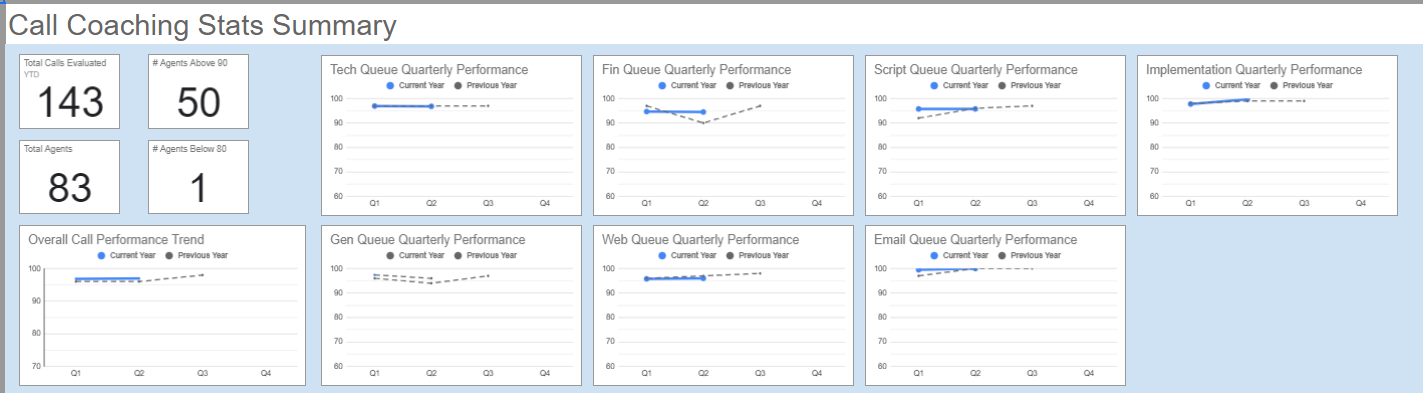